# Bert Surprisal
Single-predictor models with surprisal on BERT language model predictions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from tools.create import create_single_models, create_set_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from tools.viz import plot_contrast_by_analysis

In [3]:
api = Neuroscout()

## Create and compile

In [9]:
transformations = [{"Name": "Scale", 
                    "Demean": True, 
                    "Rescale": True,
                    "ReplaceNA": "after", 
                    "Input": ["BERTLM_pre_25_surprisal"]}]

In [10]:
# Note that this will include cosine* and nonsteadstate* for all runs that fitlins finds them for, dynamically
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 
             'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

In [11]:
single_models = create_single_models(["BERTLM_pre_25_surprisal"], confounds, transformations=transformations)

In [22]:
dump_collection(single_models, 'models/bert_surprisal.json')

In [4]:
single_models = load_collection('models/bert_surprisal.json')

### Reports

In [9]:
""" Run reports for all models """
for (pred, dataset, task), model in flatten_collection(single_models):
    model.generate_report(run_id=model.runs[0])

In [10]:
# Plot example design matrix
single_models['BERTLM_pre_25_surprisal']['LearningTemporalStructure']['movie'].plot_report()

'OK'

### Compile

In [29]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{model.status}')
        print(f'{dataset}')

PASSED
HealthyBrainNetwork
PASSED
LearningTemporalStructure
PASSED
Life
PASSED
ParanoiaStory
PASSED
Raiders
PASSED
Sherlock
PASSED
SherlockMerlin
PASSED
SherlockMerlin


In [26]:
print(' '.join([model.hash_id for (pred, dataset, task), model in flatten_collection(single_models)]))

MRa8R Aoprm MPqz3 A6oXp wgy3Y wl80p AxBnD wJ3Dp


## Results

In [6]:
flat_models = flatten_collection(single_models)

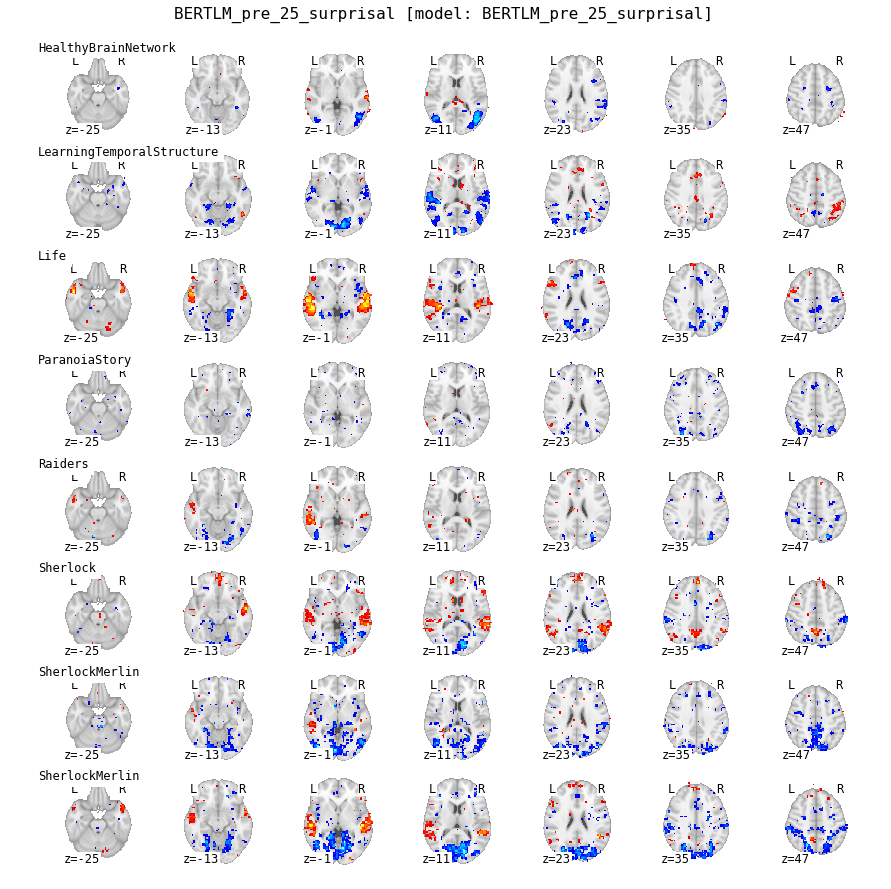

In [7]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(analyses=flat_models,
                         contrasts=['BERTLM_pre_25_surprisal'],
                         vmax=10, display_mode='z', figsize=(15,15),
                         threshold=3, colorbar=False)